<a href="https://colab.research.google.com/github/deconasser/UdemyCourse/blob/main/Jose%20Portilla%2C%20Plerian%20Training/Section6_Feature_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def display(img, cmap="gray"):
  fig = plt.figure(figsize=(4,6))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap=cmap)


In [3]:
reeses = cv2.imread("/content/reeses_puffs.png", 0)

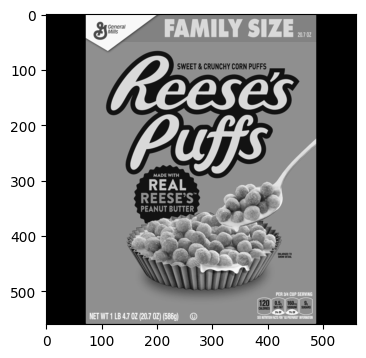

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread("/content/many_cereals.jpg", 0)

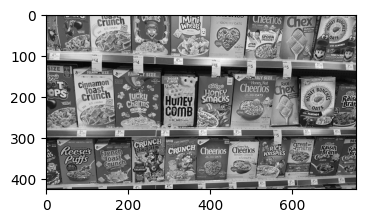

In [6]:
display(cereals)

In [ ]:
# Brute_force with ORB

In [7]:
orb = cv2.ORB_create()

In [10]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Các tham số:

#     cv2.NORM_HAMMING: Đây là kiểu chuẩn hóa (norm type) dùng để so sánh các mô tả. NORM_HAMMING được sử dụng phổ biến với các mô tả nhị phân như BRIEF, ORB, BRISK.
#     crossCheck=True: Tham số này cho biết liệu quá trình so khớp có thực hiện kiểm tra chéo hay không. Nếu True, chỉ các cặp so khớp mà điểm đặc trưng i từ ảnh thứ nhất khớp với điểm đặc trưng j từ ảnh thứ hai và ngược lại mới được chấp nhận

In [12]:
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

In [13]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:20], None, flags=2)

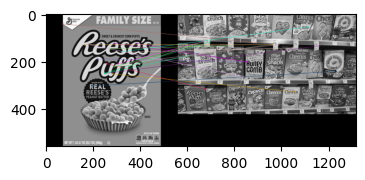

In [14]:
display(reeses_matches)

In [ ]:
# Brute_force with SIFT

In [18]:
sift = cv2.xfeatures2d.SIFT_create()


In [19]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [20]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [21]:
# Lọc các cặp điểm so khớp tốt bằng tỷ lệ khoảng cách
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


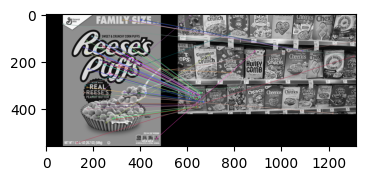

In [22]:
# Vẽ các kết quả so khớp
matching_result = cv2.drawMatches(reeses, kp1, cereals, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Hiển thị ảnh kết quả
display(matching_result)